In [1]:
import numpy as np
x_test = np.load('/home/jovyan/X-IIoTID/x_test.npy')
x_train = np.load('/home/jovyan/X-IIoTID/x_train.npy')
x_val = np.load('/home/jovyan/X-IIoTID/x_val.npy')
y_test = np.load('/home/jovyan/X-IIoTID/y_test.npy')
y_train = np.load('/home/jovyan/X-IIoTID/y_train.npy')
y_val = np.load('/home/jovyan/X-IIoTID/y_val.npy')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
import numpy as np
import pandas as pd
from time import time
from pathlib import Path

In [3]:
# knn_org = KNeighborsClassifier()
# knn_org.fit(x_train, y_train)
# y_pred_knn = knn_org.predict(x_test)

# accuracy_knn = accuracy_score(y_test, y_pred_knn)
# micro_f1_knn = f1_score_rep(y_test, y_pred_knn, average="micro")
# macro_f1_knn = f1_score_rep(y_test, y_pred_knn, average="macro")

# print(f'Gaussian Naive Bayes Test Accuracy: {accuracy_knn * 100:.2f}%')
# print(f'Gaussian Naive Bayes Micro F1 Score: {micro_f1_knn}')
# print(f'Gaussian Naive Bayes Macro F1 Score: {macro_f1_knn}')

In [4]:
# # 定义参数
# knn_params = {
#     'n_neighbors': range(1, 31),  # 邻居的数量
#     'metric': ['euclidean', 'manhattan', 'minkowski'],  # 距离度量
#     'p': [1, 2]  # 用于 minkowski 距离的幂参数
# }

# # 确保结果目录存在
# result_dir = Path('/content/drive/MyDrive/Cybersecurity/Datasets/results')
# if not result_dir.exists():
#     result_dir.mkdir()

# def tune_with_halving_grid_search(x_train, y_train, param_grid):
#     knn = KNeighborsClassifier()

#     start = time()
#     halving_knn_results = HalvingGridSearchCV(
#         knn,
#         param_grid,
#         cv=5,
#         factor=2,
#         min_resources='exhaust',
#         scoring='accuracy'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = pd.DataFrame(halving_knn_results.cv_results_)
#     results.to_csv(result_dir / 'halving_knn_results.csv')

#     # 格式化和排序结果
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

# # 使用验证数据集进行参数调整
# halving_results, halving_duration = tune_with_halving_grid_search(x_val, y_val, knn_params)

# print(halving_results.head())

# # 获取最佳参数和分数
# best_score = halving_results['mean_test_score'].iloc[0]
# best_params = halving_results['params'].iloc[0]

# # 使用最佳参数训练 KNN 模型
# best_knn = KNeighborsClassifier(**best_params)
# best_knn.fit(x_train, y_train)

# # 在测试集上评估
# accuracy = accuracy_score(y_test, best_knn.predict(x_test))
# micro_f1 = f1_score_rep(y_test, best_knn.predict(x_test), average="micro")
# macro_f1 = f1_score_rep(y_test, best_knn.predict(x_test), average="macro")

# # 打印结果
# print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# print(f'Params: {best_params}')
# print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# print("Micro F1 Score: ", micro_f1)
# print("Macro F1 Score: ", macro_f1)

In [5]:
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# from sklearn.datasets import load_digits

# best_knn = KNeighborsClassifier(metric='minkowski', n_neighbors=3, p=1)
# best_knn.fit(x_train, y_train)
# # bestpredict = best_knn.predict(x_test)

# # # 在测试集上评估
# # accuracy = accuracy_score(y_test, best_knn.predict(x_test))
# # micro_f1 = f1_score_rep(y_test, bestpredict, average="micro")
# # macro_f1 = f1_score_rep(y_test, bestpredict, average="macro")

# # # 打印结果
# # # print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# # # print(f'Params: {best_params}')
# # print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# # print("Micro F1 Score: ", micro_f1)
# # print("Macro F1 Score: ", macro_f1)

FPR: [3.05735600e-05 7.37505370e-04 1.43050261e-05 3.75150171e-03
 2.94544303e-05 0.00000000e+00 3.95072370e-04 2.26174411e-04
 3.74809839e-04 1.42645213e-05 9.34989463e-05 1.13068095e-02
 8.81389069e-05 2.14244396e-05 1.19485912e-04 6.65202744e-04
 3.56788617e-05 2.14284184e-04 2.18526693e-05]
TPR: [0.99989359 0.78596491 0.99761337 0.93781586 0.99954823 0.8
 0.95862069 0.99775992 0.98942562 0.36363636 0.96893367 0.99032484
 0.99987036 0.92610837 0.99414835 0.71631206 0.98901099 0.66812227
 1.        ]
FNR: [1.06405618e-04 2.14035088e-01 2.38663484e-03 6.21841354e-02
 4.51773210e-04 2.00000000e-01 4.13793103e-02 2.24008433e-03
 1.05743812e-02 6.36363636e-01 3.10663308e-02 9.67515602e-03
 1.29642834e-04 7.38916256e-02 5.85165270e-03 2.83687943e-01
 1.09890110e-02 3.31877729e-01 0.00000000e+00]
TNR: [0.99996943 0.99926249 0.99998569 0.9962485  0.99997055 1.
 0.99960493 0.99977383 0.99962519 0.99998574 0.9999065  0.98869319
 0.99991186 0.99997858 0.99988051 0.9993348  0.99996432 0.9997857

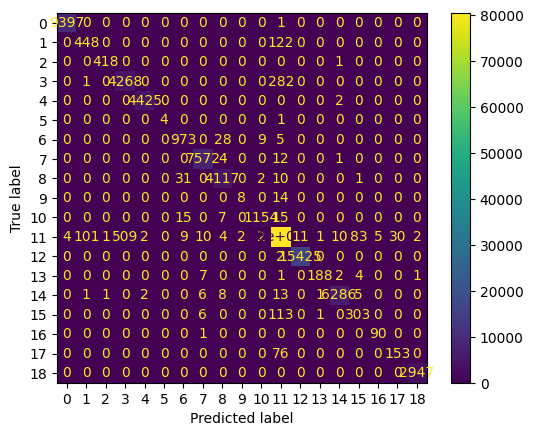

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_digits

best_knn = KNeighborsClassifier(metric='minkowski', n_neighbors=3, p=1)
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, best_knn.predict_proba(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")


print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=best_knn.classes_)
disp.plot()
plt.show()

In [1]:
import numpy as np
x_test = np.load('/home/jovyan/X-IIoTID/x_test.npy')
x_train = np.load('/home/jovyan/X-IIoTID/x_train.npy')
x_val = np.load('/home/jovyan/X-IIoTID/x_val.npy')
y_test = np.load('/home/jovyan/X-IIoTID/y_test.npy')
y_train = np.load('/home/jovyan/X-IIoTID/y_train.npy')
y_val = np.load('/home/jovyan/X-IIoTID/y_val.npy')

from joblib import dump, load
from sklearn.neighbors import KNeighborsClassifier

best_knn = KNeighborsClassifier(metric='minkowski', n_neighbors=3, p=1)
best_knn.fit(x_train, y_train)

dump(best_knn, "/home/jovyan/X-IIoTID/pre_train/KNN.joblib")

['/home/jovyan/X-IIoTID/pre_train/KNN.joblib']